In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy.stats.stats import pearsonr
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import metrics
import pandas as pd
import seaborn as sns

# Get data

In [2]:
data_array = pd.read_csv('smoke_detection_iot.csv',delimiter=',')

In [3]:
data_array

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [4]:
del data_array["Unnamed: 0"]
data_array

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


# Distribution of data 

In [48]:
variables=["UTC", "Temperature[C]", "Humidity[%]", "TVOC[ppb]", "Raw H2", "Raw Ethanol", "Pressure[hPa]",  "CNT", "Fire Alarm"]

C:\Users\Yuliia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


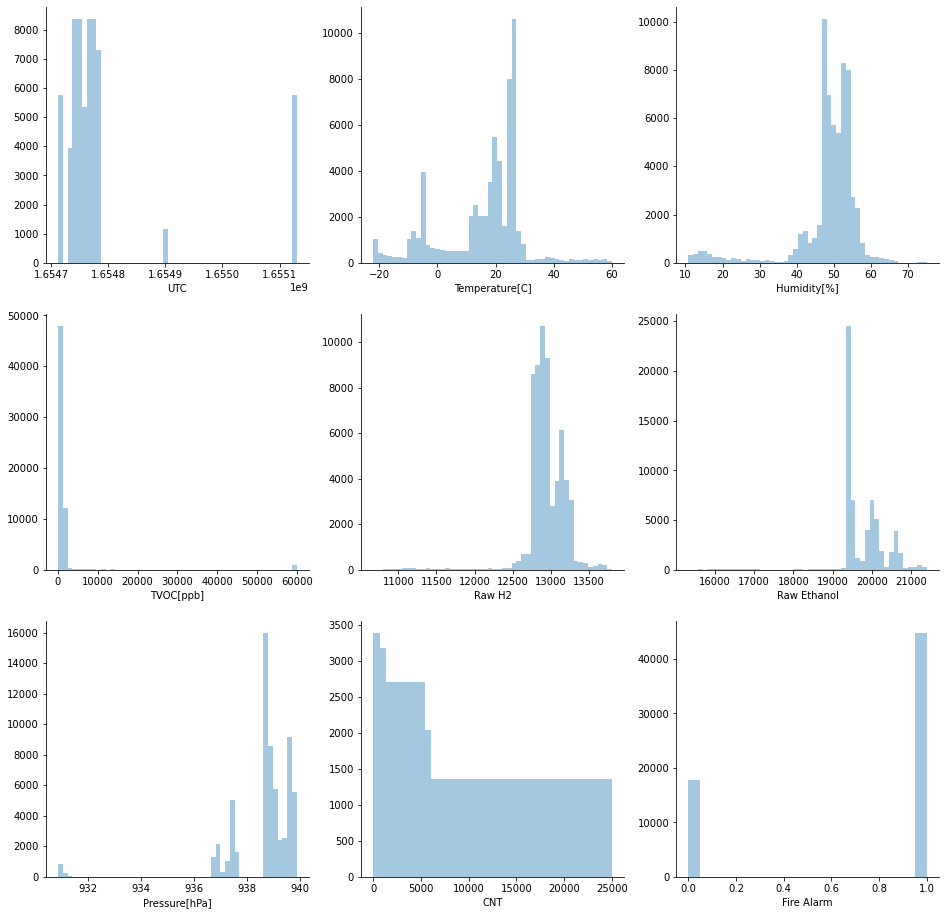

In [49]:
fig, ax = plt.subplots(figsize=(16,16))
for i in range(len(variables)):
    plt.subplot(3,3,i+1)
    x=data_array[variables[i]]
    sns.distplot(x, kde=False)
    sns.despine()

# Correlation

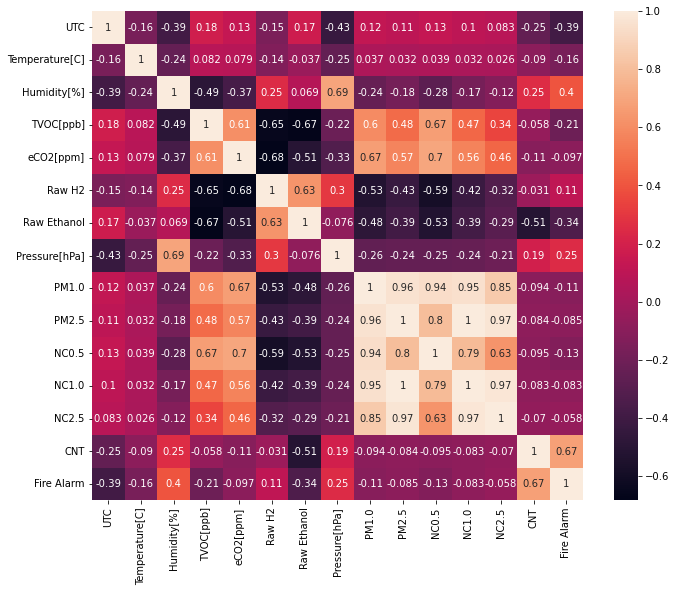

Fire Alarm        1.000000
CNT               0.673762
Humidity[%]       0.399846
Pressure[hPa]     0.249797
Raw H2            0.107007
NC2.5            -0.057707
NC1.0            -0.082828
PM2.5            -0.084916
eCO2[ppm]        -0.097006
PM1.0            -0.110552
NC0.5            -0.128118
Temperature[C]   -0.163902
TVOC[ppb]        -0.214743
Raw Ethanol      -0.340652
UTC              -0.389404
Name: Fire Alarm, dtype: float64

In [7]:
fig, ax = plt.subplots(figsize=(11,9))
correl = data_array.corr()
sns.heatmap(correl,annot=True)
plt.show()
correl["Fire Alarm"].sort_values(ascending=False)

In [8]:
del data_array["NC2.5"]
del data_array["NC1.0"]
del data_array["PM2.5"]
del data_array["eCO2[ppm]"]
data_array

,UTC,Temperature[C],Humidity[%],TVOC[ppb],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,NC0.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,12306,18520,939.735,0.00,0.00,0,0
1,1654733332,20.015,56.67,0,12345,18651,939.744,0.00,0.00,1,0
2,1654733333,20.029,55.96,0,12374,18764,939.738,0.00,0.00,2,0
3,1654733334,20.044,55.28,0,12390,18849,939.736,0.00,0.00,3,0
4,1654733335,20.059,54.69,0,12403,18921,939.744,0.00,0.00,4,0
...,...,...,...,...,...,...,...,...,...,...,...
62625,1655130047,18.438,15.79,625,13723,20569,936.670,0.63,4.32,5739,0
62626,1655130048,18.653,15.87,612,13731,20588,936.678,0.61,4.18,5740,0
62627,1655130049,18.867,15.84,627,13725,20582,936.687,0.57,3.95,5741,0
62628,1655130050,19.083,16.04,638,13712,20566,936.680,0.57,3.92,5742,0


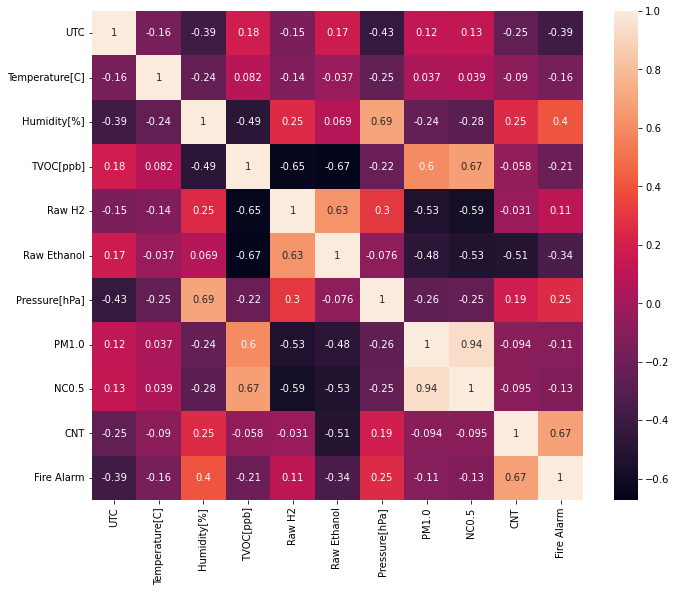

Fire Alarm        1.000000
CNT               0.673762
Humidity[%]       0.399846
Pressure[hPa]     0.249797
Raw H2            0.107007
PM1.0            -0.110552
NC0.5            -0.128118
Temperature[C]   -0.163902
TVOC[ppb]        -0.214743
Raw Ethanol      -0.340652
UTC              -0.389404
Name: Fire Alarm, dtype: float64

In [9]:
fig, ax = plt.subplots(figsize=(11,9))
correl = data_array.corr()
sns.heatmap(correl,annot=True)
plt.show()
correl["Fire Alarm"].sort_values(ascending=False)

# Box-plot

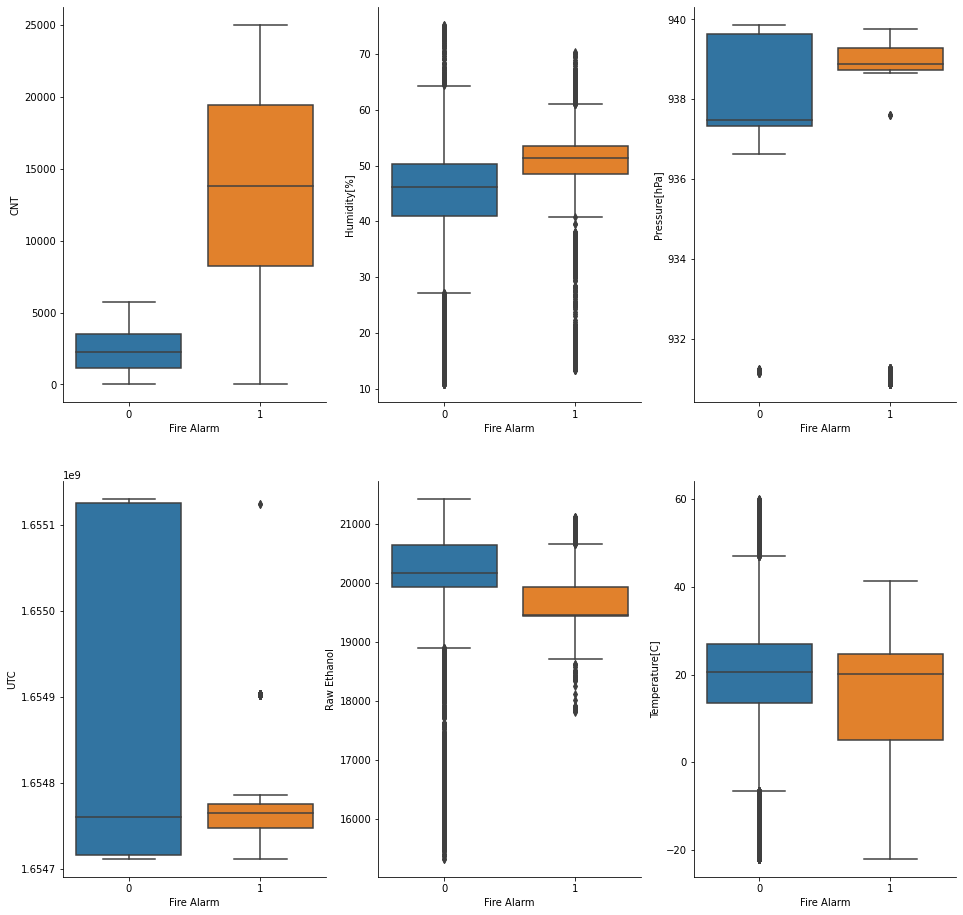

In [10]:
variables=["CNT", "Humidity[%]", "Pressure[hPa]", "UTC", "Raw Ethanol", "Temperature[C]"]
fig, ax = plt.subplots(figsize=(16,16))
for i in range(len(variables)):
    plt.subplot(2,3,i+1)
    var=data_array[variables[i]]
    sns.boxplot(x=data_array["Fire Alarm"], y = var)
    sns.despine()

# Decision Tree Classifier

In [11]:
data_without_y = data_array.copy()
del data_without_y["Fire Alarm"]

In [12]:
x_train, x_test, y_train, y_test = train_test_split(data_without_y,     
                                                    data_array['Fire Alarm'].values, 
                                                    train_size=0.3)

In [13]:
tree_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)
tree_clf = tree_clf.fit(x_train, y_train)
y_pred=tree_clf.predict(x_test)
pd.DataFrame({"true":y_test, "pred":y_pred})

,true,pred
0,0,0
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
43836,1,1
43837,1,1
43838,1,1
43839,1,1


In [14]:
accuracy_score(y_test, y_pred)

0.9982208435026574

In [15]:
result=metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(result)

Confusion matrix:
[[12458    51]
 [   27 31305]]


## Find best tree params

In [16]:
tree_params = {'max_depth': range(1,11), 'max_features': range(2,5)}

In [17]:
tree_grid = GridSearchCV(tree_clf, tree_params, cv=5, n_jobs=-1, verbose=True)
tree_grid.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                              min_samples_leaf=5),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(2, 5)},
             verbose=True)

In [18]:
tree_grid.best_params_

{'max_depth': 6, 'max_features': 3}

In [19]:
tree_grid.best_score_

0.9995210218201172

In [20]:
y_pred=tree_grid.predict(x_test)
pd.DataFrame({"true":y_test, "pred":y_pred})

,true,pred
0,0,0
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
43836,1,1
43837,1,1
43838,1,1
43839,1,1


In [21]:
result=metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(result)

Confusion matrix:
[[12497    12]
 [   31 31301]]


## Show the tree 

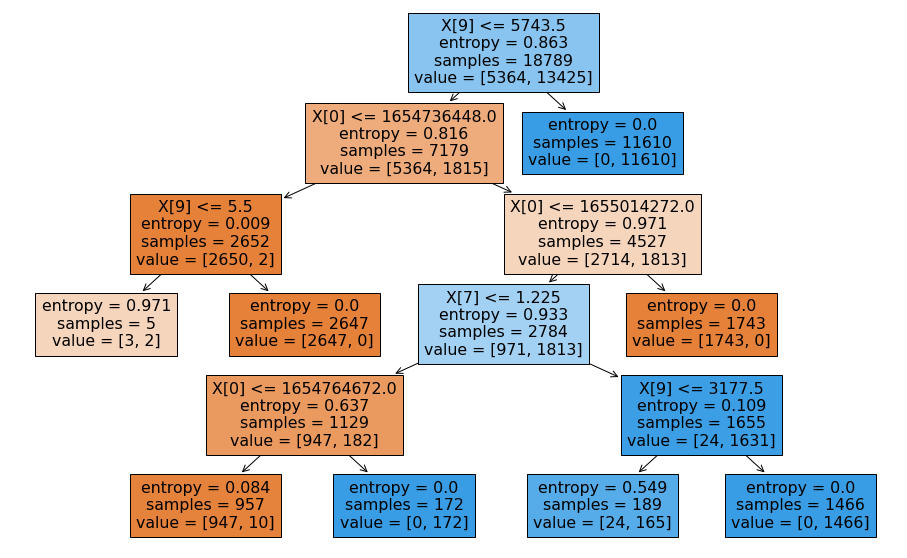

In [22]:
plt.figure(figsize=(16,10))
tree.plot_tree(tree_clf, filled = True)
plt.show()

# Random Forest Classifier

In [23]:
scores=[]
for i in range (2,20):
    forest_clf = RandomForestClassifier(n_estimators = i, criterion='entropy')
    forest_clf = forest_clf.fit(x_train, y_train) 
    y_pred=forest_clf.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    print(i, "  trees   =>   accuracy = ", accuracy_score(y_test, y_pred))

2   trees   =>   accuracy =  0.9994753769302708
3   trees   =>   accuracy =  0.9996350448210579
4   trees   =>   accuracy =  0.9997490933144774
5   trees   =>   accuracy =  0.9998403321092129
6   trees   =>   accuracy =  0.9997947127118451
7   trees   =>   accuracy =  0.9997719030131612
8   trees   =>   accuracy =  0.9999315709039484
9   trees   =>   accuracy =  0.9997947127118451
10   trees   =>   accuracy =  0.9997947127118451
11   trees   =>   accuracy =  0.9997034739171096
12   trees   =>   accuracy =  0.9998403321092129
13   trees   =>   accuracy =  0.9997947127118451
14   trees   =>   accuracy =  0.9998403321092129
15   trees   =>   accuracy =  0.9998403321092129
16   trees   =>   accuracy =  0.9998403321092129
17   trees   =>   accuracy =  0.9998403321092129
18   trees   =>   accuracy =  0.9998403321092129
19   trees   =>   accuracy =  0.9998631418078967


Text(0, 0.5, 'Accuracy')

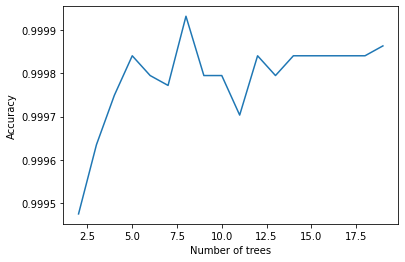

In [24]:
plt.plot(range(2,20),scores)
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")

In [25]:
result=metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(result)

Confusion matrix:
[[12505     4]
 [    2 31330]]


# Scale

In [26]:
variables=["UTC", "Temperature[C]", "Humidity[%]", "TVOC[ppb]", "Raw H2", "Raw Ethanol", "Pressure[hPa]", "PM1.0", "NC0.5", "CNT"]
scaler = StandardScaler()
data_without_y[variables] = scaler.fit_transform(data_without_y[variables])
data_without_y

,UTC,Temperature[C],Humidity[%],TVOC[ppb],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,NC0.5,CNT
0,-0.533948,0.280622,0.994947,-0.248614,-2.335935,-2.025006,0.831761,-0.109043,-0.115215,-1.383476
1,-0.533939,0.281666,0.917115,-0.248614,-2.192796,-1.810079,0.838521,-0.109043,-0.115215,-1.383344
2,-0.533930,0.282641,0.837028,-0.248614,-2.086359,-1.624683,0.834014,-0.109043,-0.115215,-1.383212
3,-0.533921,0.283686,0.760324,-0.248614,-2.027636,-1.485227,0.832512,-0.109043,-0.115215,-1.383081
4,-0.533912,0.284730,0.693773,-0.248614,-1.979923,-1.367099,0.838521,-0.109043,-0.115215,-1.382949
...,...,...,...,...,...,...,...,...,...,...
62625,3.072508,0.171843,-3.694123,-0.168604,2.864787,1.336720,-1.470443,-0.108360,-0.114202,-0.628127
62626,3.072517,0.186816,-3.685100,-0.170269,2.894149,1.367893,-1.464434,-0.108382,-0.114235,-0.627995
62627,3.072526,0.201719,-3.688484,-0.168348,2.872128,1.358049,-1.457674,-0.108425,-0.114289,-0.627863
62628,3.072535,0.216761,-3.665924,-0.166940,2.824415,1.331798,-1.462932,-0.108425,-0.114296,-0.627732


# SVM

In [27]:
x_train, x_test, y_train, y_test = train_test_split(data_without_y,     
                                                    data_array['Fire Alarm'].values, 
                                                    train_size=0.3)

In [28]:
for i in ['linear', 'poly', 'rbf', 'sigmoid']:
    svc_clf = SVC(kernel=i)
    svc_clf = svc_clf.fit(x_train, y_train)
    y_pred=svc_clf.predict(x_test)
    print('kernel type:', i)
    print('accuracy = ', accuracy_score(y_test, y_pred))

kernel type: linear
accuracy =  0.9927693255172099
kernel type: poly
accuracy =  0.9995666157250063
kernel type: rbf
accuracy =  0.9996122351223741
kernel type: sigmoid
accuracy =  0.8595378755046645


In [29]:
svc_param = {'C': [0.1, 1, 10, 100, 1000], 
             'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'kernel': ['rbf']}
svc_grid = GridSearchCV(SVC(), svc_param, cv=5, n_jobs=-1, verbose=True)
svc_grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=True)

In [30]:
svc_grid.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [31]:
svc_grid.best_score_

0.9997339010111762

In [32]:
svc_grid_pred = svc_grid.predict(x_test)

In [33]:
result=metrics.confusion_matrix(y_test, svc_grid_pred)
print("Confusion matrix:")
print(result)

Confusion matrix:
[[12427    12]
 [    3 31399]]


# K Neighbors Classifier

In [44]:
x_train, x_test, y_train, y_test = train_test_split(data_without_y,     
                                                    data_array['Fire Alarm'].values, 
                                                    train_size=0.3)

In [45]:
scores=[]
for k in range(1,10):
    knc=KNeighborsClassifier(n_neighbors=k)
    knc.fit(x_train,y_train)
    y_pred=knc.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    print("k = ", k, "     =>   accuracy = ", accuracy_score(y_test, y_pred))

k =  1      =>   accuracy =  0.9996122351223741
k =  2      =>   accuracy =  0.9996122351223741
k =  3      =>   accuracy =  0.9996122351223741
k =  4      =>   accuracy =  0.9996350448210579
k =  5      =>   accuracy =  0.9995438060263224
k =  6      =>   accuracy =  0.9995438060263224
k =  7      =>   accuracy =  0.9995666157250063
k =  8      =>   accuracy =  0.9995438060263224
k =  9      =>   accuracy =  0.9995209963276385


Text(0, 0.5, 'Accuracy')

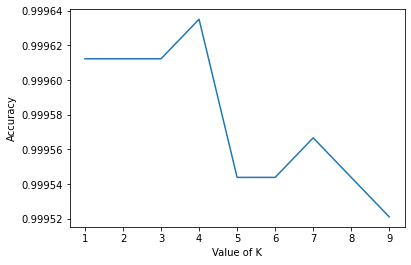

In [46]:
plt.plot(range(1,10),scores)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

In [47]:
result=metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(result)

Confusion matrix:
[[12527    18]
 [    3 31293]]


# Ada Boost Classifier

In [38]:
x_train, x_test, y_train, y_test = train_test_split(data_without_y,     
                                                    data_array['Fire Alarm'].values, 
                                                    train_size=0.3)


In [39]:
abc =AdaBoostClassifier(n_estimators=50, learning_rate=1)
model = abc.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [40]:
pd.DataFrame({"true":y_test, "pred":y_pred})

,true,pred
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1
...,...,...
43836,1,1
43837,0,0
43838,1,1
43839,0,0


In [41]:
accuracy_score(y_test, y_pred)

0.9998631418078967

In [42]:
result=metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(result)

Confusion matrix:
[[12488     4]
 [    2 31347]]


In [43]:
result=metrics.classification_report(y_test, y_pred)
print("Classification report:")
print(result)

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12492
           1       1.00      1.00      1.00     31349

    accuracy                           1.00     43841
   macro avg       1.00      1.00      1.00     43841
weighted avg       1.00      1.00      1.00     43841

